In [1]:
# Outlier detection using Isolation Forest 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Automatically created module for IPython interactive environment


In [2]:
rng = np.random.RandomState(42)

In [3]:
rng

In [4]:
# Generate train data
X = 0.3 * rng.randn(100, 2)

In [5]:
X

array([[ 0.14901425, -0.04147929],
       [ 0.19430656,  0.45690896],
       [-0.07024601, -0.07024109],
       [ 0.47376384,  0.23023042],
       [-0.14084232,  0.16276801],
       [-0.13902531, -0.13971893],
       [ 0.07258868, -0.57398407],
       [-0.51747535, -0.16868626],
       [-0.30384934,  0.0942742 ],
       [-0.27240722, -0.42369111],
       [ 0.43969463, -0.06773289],
       [ 0.02025846, -0.42742446],
       [-0.16331482,  0.03327678],
       [-0.34529807,  0.11270941],
       [-0.18019161, -0.08750812],
       [-0.18051198,  0.55568346],
       [-0.00404917, -0.31731328],
       [ 0.24676347, -0.36625309],
       [ 0.06265908, -0.58790104],
       [-0.39845581,  0.05905837],
       [ 0.22153997,  0.05141048],
       [-0.03469448, -0.09033111],
       [-0.4435566 , -0.21595326],
       [-0.13819163,  0.31713667],
       [ 0.10308549, -0.52891205],
       [ 0.09722519, -0.11552468],
       [-0.2030766 ,  0.18350289],
       [ 0.30929986,  0.27938404],
       [-0.25176526,

In [6]:
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations

In [8]:
X = 0.3 * rng.randn(20, 2)

In [9]:
X_test = np.r_[X + 2, X - 2]

In [10]:
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [21]:
clf = IsolationForest(behaviour='new', max_samples=100, random_state=rng, contamination='auto')

In [22]:
clf.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x000001C0A2DAFEA0>,
                verbose=0, warm_start=False)

In [23]:
y_pred_train = clf.predict(X_train)

In [24]:
y_pred_test = clf.predict(X_test)

In [25]:
# fit the model
y_pred_outliers = clf.predict(X_outliers)

In [26]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

In [27]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

In [28]:
Z = Z.reshape(xx.shape)

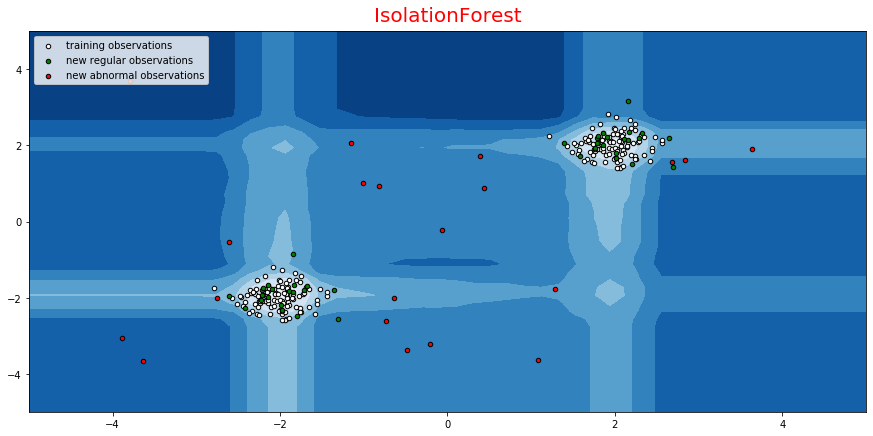

In [42]:
plt.figure(figsize=(15,7))
plt.title("IsolationForest",c='red', size=20, pad=10)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],["training observations","new regular observations", "new abnormal observations"],loc="upper left")
plt.show()